# Minecraft and Player Data: A Project

## Introduction

Minecraft is a well known video game available on a wide range of platforms. You can play it on Windows, Mac, Linux, Xbox, PlayStation, Nintendo Switch, Android, iOS and many more. With such accessibility, it's no wonder this game is so popular. Minecraft is a game made up of blocks, creatures and user community. You can build, dig, create structures, landscapes, gather resources, craft items, connect with friends and more depending on the selected game mode! 

*Source: https://minecraft.wiki/*

Of course, such a game would mean millions of players everyday... so a research group in Computer Science at UBC, led by Frank Wood, collected data about how people play video games. They have set up a MineCraft server, and players' actions are recorded as they navigate through the world. But running this project is not simple: they need to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract.

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. 
More specifically, we want to know: 

**“Can the `experience` of the player predict `played_hours` in the `players` dataset?”**

To answer this question, we will use the <b>players</b> dataset to analyze player data collected by the UBC research group. The dataset is a list of all unique players, including data about each player, containing 196 rows and 7 columns. 

The columns in the dataset are:
- `experience`-The level of experience of the player, ranging from Amateur to Pro
- `subscribe`-Whether the player has a paid subscription to Minecraft
- `hashedEmail`-The hashed emails of the player
- `played_hours`-The amount of hours played by each player (hrs)
- `name`-Name of the player
- `gender`-Gender of the player
- `Age`-Age of the player (yrs)

To answer our question of whether the experience of the player can predict the amount of hours played in the players dataset, we will use linear regression. Our predictor will be `experience`and `played_hours`as the continuous variable.

## Methods & Results

In [1]:
#we want to first load the appropriate packages
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The appropriate packages were loaded. 

Our first step to the regression problem is to read the file `players.csv` using the shortest relative path. The data is located in the data folder where we can preview to choose the appropriate `read_*` function. Here we want to use the `read_csv` for comma-separated files because the deliminator is a `,`.  

The read file will be assigned to a `players` object for future reference. 

In [2]:
players <-read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA



We want to use the `experience` variable but we have to convert the values to numeric values to compute correlations with `played_hours` and plot trends.

To do this, we need to mutate the experience column and order the categorical values by numbers. We will assign the new object to `players` and the mutated column `experience_num`. 
From then on, we will use `experience_num` instead. Lastly we use the `select()` function to isolate our desired columns `experience_num` and `played_hours`.

In [3]:
#we first need to check the different experience levels
players|>
distinct(experience) |> #distinct filters the repetitive values 
pull(experience)

#We can mutate the experience column and select only the columns we want (played_hours and experience_num) 
players <- players |>
  mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"), ordered = TRUE),
         experience_num = as.numeric(experience))|> #We ordered the categorical values and set them as numeric values
  select(experience_num, played_hours)

players

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

experience_num,played_hours
<dbl>,<dbl>
4,30.3
5,3.8
5,0.0
⋮,⋮
2,0.0
2,2.3
4,0.2


We have fixed our dataset, so now we need to perform simple linear regression. 


Linear regression requires us to split the data into a training and testing set. So we will have to use the `initial_split` function to first choose the proportion and strata of our split data. We will use `prop=0.75` and set the `strata` to `played_hours` as that is what we are trying to predict. The split data assigned to `players_split`. Then train the split data with `training` and test with `testing`. The training and testing sets will be assigned to objects `players_training` and `players_testing`.  

In [4]:
set.seed(10) # we will use set.seed to ensure random number generation and reproducibility

players_split <- initial_split(players, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

After obtaining our training data, we will create a model specification and recipe to fit to our simple regression model.
We will use the `linear_reg` function to create the model and assign it to object `players_spec`. The engine set to `lm` and mode set to `regression`. 
Our recipe will be assigned to `players_recipe` with class= `played_hours` and predictor `experience_num` using the training data.
Using `workflow()` we add the recipe and spec then fit the data to the training data. 

In [5]:
players_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

players_recipe <- recipe(played_hours ~ experience_num, data = players_training)

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)  experience_num  
         10.99           -1.11  


Now we have to predict on the test data set to assess how well our model has done. We assign our test results to the object `players_test_results` then use `predict`, `bind_cols` and `metrics()` with truth set to `played_hours` and estimate=`.pred`. We are going to be assessing the model based on the RMSPE value. RMSPE is the root mean squared percentage error and a metric used to assess the accuracy of the regression model. The lower the rmspe the better. 

In [6]:
players_test_results <- players_fit |>
  predict(players_testing) |>
  bind_cols(players_testing) |>
  metrics(truth = played_hours, estimate = .pred)
players_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.805168e+00
rsq,standard,5.091732e-06
mae,standard,7.606238e+00


Here we found that our RMSPE is about 7.8 hours off the true `played_hours`. We can't really tell if this means our model is "good" just based off this value so we will need to plot the data to visualize the simple regression model. 

To visualize the simpler regression model, we can plot the predicted hours played across possible experience levels. Since we have a linear model we will only have to use the predicted hours and experience then connect them with a regression line. 

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


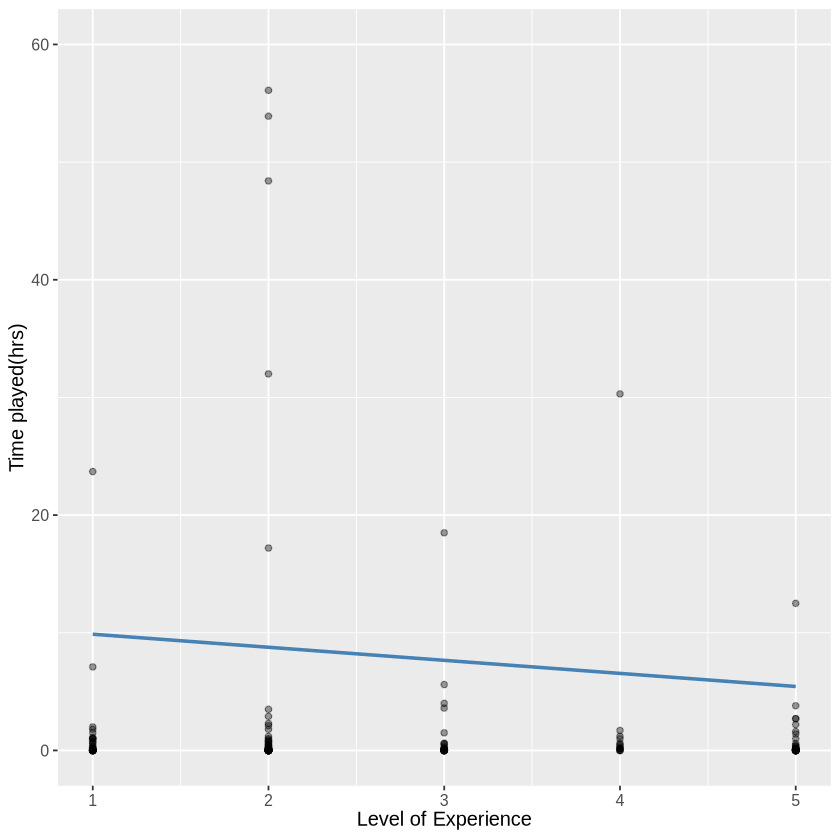

In [9]:
experience_prediction_grid <- tibble(
    experience_num = c(
        players |> select(experience_num) |> min(),
        players |> select(experience_num) |> max() ))

players_preds <- players_fit |>
  predict(experience_prediction_grid) |>
  bind_cols(experience_prediction_grid)

players_plot_final <- ggplot(players, aes(x = experience_num, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = players_preds,
            mapping = aes(x = experience_num, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Level of Experience") +
  ylab("Time played(hrs)") +
  theme(text = element_text(size = 12))+
  ylim(c(0,60))

players_plot_final

We want to extract the coefficients from our fit object and extract it form the workflow using the `extract_fit_parsnip()` function and then tidy it to convert it to a dataframe.

In [56]:
coeffs <- players_fit |>
             extract_fit_parsnip() |>
             tidy()

coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),10.986104,6.197796,1.7725825,0.07841236
experience_num,-1.110026,1.866383,-0.5947471,0.55294593


## Discussion

Based on the simple linear regression plot, there is a weak relationship between time played and level of experience in playing Minecraft. We used simple linear regression because we hypothesized a positive relationship between time played and level of experience. Instead there seems to be a slight negative relationship between the two variables. The many outliers within the data may have strongly influenced the relationship. Based on the visualization, 